## OpenCV I/O functionality

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

The above piece of code imported all the packages we need through this tutorial.

Now, let's load an image.

### Load, display and save images
Use the function [`cv2.imread()`](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=imread#cv2.imread) to read an image. The function accepts two arguments, the first argument is the path of the image and the second argument is a flag indicating how to decode the image, there are three options:
- `cv2.IMREAD_COLOR`: load the image in color mode
- `cv2.IMREAD_GRAYSCALE`: load the image in grayscale mode
- `cv2.IMREAD_UNCHANGED`: load the image in color+alpha mode if the image has an alpha (controls transparency) channel, otherwise in color mode

Use the function [`cv2.imshow()`](http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=imshow#cv2.imshow) to display an image. This function accepts two arguments, the first argument is the window name and the second one is the image, which is an numpy array.

In [ ]:
# load the image
image = cv2.imread('dog.png', cv2.IMREAD_COLOR)
# TODO: check size of images loaded with different options
print image.shape

In [ ]:
# display the image
cv2.imshow('display', image)

Running the code above doesn't show us the image, we need to run the "event loop" and go into the display thread by calling [`cv2.waitKey()`](http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=waitkey#waitkey). You can either give this function an integer argument, which is the amount of time to wait (in milliseconds) or leave out the argument, which means the display thread will wait forever until you press a key. The value returned is the ASCII code of the key you pressed. We can use this to wait for a specific key stroke and manipulate the image in different ways according to the key pressed.

In [ ]:
# press any key to close the window
cv2.waitKey()
# close the window
cv2.destroyWindow('display')

**Example**

Wait for a specific key, say 'x'.

In [ ]:
image = cv2.imread('dog.png', cv2.IMREAD_UNCHANGED)
key = None
while key != ord('x'):
    cv2.imshow('display', image)
    # wait for 30 ms
    key = cv2.waitKey(30)
# close the window
cv2.destroyWindow('display')

**Example** 

Do different things to the image according to the key pressed.
- 'v': flip the image vertically
- 'h': flip the image horizontally
- 'u': upsample the image by a factor of 2
- 'd': downsample the image by a factor of 2
- 'r': show the red channel of the image
- 'g': show the green channel of the image
- 'b': show the blue channel of the image
- 's': save the modified image

In [ ]:
image = cv2.imread('dog.png', cv2.IMREAD_UNCHANGED)
key = None
while key != ord('x'):
    cv2.imshow('original', image)
    if key == ord('v'):
        image_new = np.flipud(image)
        cv2.imshow('modified', image_new)
    elif key == ord('h'):
        image_new = np.fliplr(image)
        cv2.imshow('modified', image_new)
    elif key == ord('u'):
        # resize the input image to desired size
        # 1st arg: image
        # 2nd arg: desired size
        # 3rd arg: interpolation method, default is bilinear
        image_new = cv2.resize(image, 
                           dsize=(1024, 1024), 
                           interpolation=cv2.INTER_LINEAR)
        cv2.imshow('modified', image_new)
    elif key == ord('d'):
        image_new = cv2.resize(image, 
                           (256, 256),
                          interpolation=cv2.INTER_LINEAR)
        cv2.imshow('modified', image_new)   
    elif key == ord('r'):
        image_new = image.copy()
        image_new[..., [0,1]] = 0
        cv2.imshow('modified', image_new)
    elif key == ord('g'):
        image_new = image.copy()
        image_new[..., [0,2]] = 0
        cv2.imshow('modified', image_new)
    elif key == ord('b'):
        image_new = image.copy()
        image_new[..., [1,2]] = 0
        cv2.imshow('modified', image_new)
    elif key == ord('s'):
        # save the image to a given path
        # 1st arg: desired image path
        # 2nd arg: image data
        cv2.imwrite('dog_new.png', image_new)                
    # wait for 30 ms
    key = cv2.waitKey(30)
# close all window
cv2.destroyAllWindows()

**useful functions**
- [`cv2.imread()`](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=imread#cv2.imread)
- [`cv2.imshow()`](http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=imshow#cv2.imshow)
- [`cv2.imwrite()`](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=imwrite#cv2.imwrite)
- [`cv2.waitKey()`](http://docs.opencv.org/3.0-beta/modules/highgui/doc/user_interface.html?highlight=waitkey#waitkey)
- [`cv2.resize()`](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=resize#cv2.resize)
- More on [reading & writing images](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/imgcodecs.html)
- More on [geometric image transformations]( http://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html)

### Use webcam to capture a video
The [`VideoCapture`](http://docs.opencv.org/3.0-beta/modules/videoio/doc/reading_and_writing_video.html?highlight=videocapture#videocapture) class provides funcationaly for video capturing from video files, image sequences or cameras. We can create a `VideoCapture` object by one of the following arguments:
- a string pointing to a video file
- an integer which is the device number of a camera
- leave it empty and assign videos/cameras later

**Create `VideoCapture` object**

Create a `VideoCapture` object and attach it to the webcam.

In [ ]:
# Create an object which can capture images.
cap = cv2.VideoCapture()
# Camera devices are indexed by integers, 
# typically your laptop webcam has device number 0.
# Do a small loop to find the proper camera and open it.
for i in range(10):
    if cap.open(i):
        print 'camera {} launched'.format(i)
        break

**Read images**

Once a `VideoCapture` object has been created and linked to videos/cameras, we can read images from it. By calling `VideoCapture::read()`, which returns a tuple of status and the actual image. A `False` status means failure in reading images. If `VideoCapture` successfully read in an image, we could display the image as usual using `cv2.imshow()`.

In [ ]:
key = None
while key != ord('x'):
    status, image = cap.read()
    assert status, 'failed to read image from camera'
    cv2.imshow('display', image)
    key = cv2.waitKey(30)
cv2.destroyWindow('display')

**Release resources**

Once done with the camera, we need to release the resource.

In [ ]:
# release the camera
cap.release()

**Example**

Read and show a recorded video from the files ystem.

In [2]:
# Create an object with a filename pointing to a video.
cap = cv2.VideoCapture('Megamind.avi')
key = None
while key != ord('x'):
    status, image = cap.read()
    if not status:
        print 'end of video'
        break
    cv2.imshow('display', image)
    key = cv2.waitKey(30)
cv2.destroyWindow('display')
cap.release()

The above code shows a minimal video player implemented in python with OpenCV. A lot of features are missing, such as pause, speed up/down the video, etc. One can do these by attach a track bar to the window. More information can be found in the [high-level gui (highgui) package](http://docs.opencv.org/3.0-beta/modules/highgui/doc/highgui.html).

### Application: Face detection in a video

**<span style="color:red">TODO: theory behind face detection ... and then the related functions.</span>**

In [ ]:
# Create a cascade face detector.
configure_file = 'haarcascade_frontalface_default.xml'
face_detector = cv2.CascadeClassifier(configure_file)
# let's load the lena image
image = cv2.imread('lena.jpg')
# The face detector takes a gray scale image as input,
# so we need to convert the color image to grayscale image first.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect faces in multi-scale.
# TODO: arguments explained ...
faces = face_detector.detectMultiScale(gray, 1.1, 2)
for (x, y, w, h) in faces:
    image = cv2.rectangle(image, (x,y), (x+w, y+h), (255, 0, 0), 2)
cv2.imshow('display', image)
cv2.waitKey()
cv2.destroyWindow('display')

**Functions explained**

- [`cv2.rectangle()`](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#rectangle): draw a rectangle on the given image (1st argument). Need to specify the top-left & bottom-right corners of the rectangle (2nd & 3rd argument, a tuple), RGB color of the rectangle border (4th argument) and width of border (5th argument).
- Other useful drawing functions include
[`cv2.circle()`](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#circle)(draw circles), 
[`cv2.line()`](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#line)(draw straight lines)
and [`cv2.putText()`](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#puttext)(overlay texts on image).
- More on [drawing functions](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#).

**Example**

Simplistic Face Swap

In [1]:
import cv2
import numpy as np


def overlay_image(foreground, background, rect):
    """
    overlay the foreground image on the background image
    at the specified location
    :param foreground: the foreground image, numpy array
    :param background: the background image, numpy array
    :param rect: a rectangle indicating where to overlay
    :return: overlaid image
    """
    row, col = foreground.shape[0:2]
    x, y, w, h = rect
    xc, yc = x + w/2, y + h/2
    ratio_x, ratio_y = w/float(col), h/float(row)
    ratio = max(ratio_x, ratio_y)
    row, col = int(ratio*row) & 0xfffe, int(ratio*col) & 0xfffe
    resized = cv2.resize(foreground, dsize=(col, row))
    ret = background.copy()
    ymin = max(yc-row/2, 0)
    ymax = min(yc+row/2, ret.shape[0])
    xmin = max(xc-col/2, 0)
    xmax = min(xc+col/2, ret.shape[1])
    size_x, size_y = xmax-xmin, ymax-ymin
    xo, yo = xmin-(xc-col/2), ymin-(yc-row/2)
    # Copy resized foreground image to background.
    ret[ymin:ymax, xmin:xmax, :] = resized[yo:size_y, xo:size_x, :]
    return ret

if __name__ == '__main__':
    face = cv2.imread('smiling_face.jpg')
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    cap = cv2.VideoCapture()
    for i in range(10):
        if cap.open(i):
            print 'camera {} launched'.format(i)
            break
    key = None
    face_location = None
    while key != ord('x'):
        status, image = cap.read()
        assert status, 'failed to grab image from camera'
        # convert color image to grayscale image
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = face_detector.detectMultiScale(gray, 1.024, 10)
        if len(faces) != 1:
            # use the previous detection result
            pass
        else:
            face_location = faces[0]
        # Potential improvement: we can use filtering techniques (Kalman, particle, etc.) to 
        # smooth detection results, i.e., instead of throwing away previous detection results, 
        # we can re-use them along with the current detection 
        # and stablize the overall detection performance.
        if face_location is not None:
            image = overlay_image(foreground=face, background=image, rect=face_location)
        cv2.imshow('display', image)
        key = cv2.waitKey(30)
    cv2.destroyWindow('display')
    cap.release()

camera 0 launched


## Feature detection & matching/tracking
Most SLAM (Simultaneously Localization and Mapping) systems rely on *sparse feature points*. A SLAM system takes a sequence of images and possibly measurements from other sensors, such as an IMU (Inertial Measurement Unit), as inputs and spits out the trajectory of the sensor platform as well as the 3D structure of the environment. The following video demonstrates the visual inertial SLAM system developled at UCLA Vision Lab.

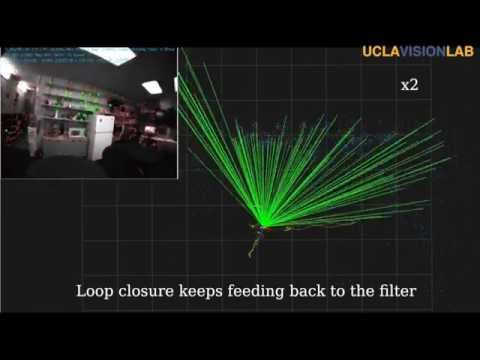

In [1]:
from IPython.display import YouTubeVideo
from datetime import timedelta

start=int(timedelta(hours=0, minutes=7, seconds=29).total_seconds())

YouTubeVideo("H7mODetStyo", start=start, width=560, height=315)

Typical pipeline of a sparse feature based SLAM system includes: 
- Sparse feature detection: detect salient feature points in the image
- Feature tracking/matching: establish correspondences between feature points across consecutive frames, either by tracking or matching
- Camera pose estimation: compute the camera pose according to the feature correspondences
- Triangulation: estimate depth of a feature point in 3D

There are also some *direct* SLAM systems which don't rely on sparse feature points. To obtain the camera pose and depth estimation, they minimize the photometric error of *every possible pixel* instead of the small set of feature points which are carefully selected by the feature detector. 

The following video demonstrates an open source direct SLAM system, which is dubbed as [*LSD-SLAM*](https://github.com/tum-vision/lsd_slam).

In [ ]:
YouTubeVideo("GnuQzP3gty4", width=560, height=315)

We will focus on *Sparse feature detection* and *tracking/matching* today. You can find more about camera pose estimation & triangulation in the [book](http://vision.ucla.edu/MASKS/) and also the [OpenCV reference manual on 3D vision](http://docs.opencv.org/3.0-beta/modules/calib3d/doc/calib3d.html).`

<span style='color:red'> TODO: explain concepts of features, correspondences and matching by illustrations</span>

<span style='color:red'> TODO: example demonstrating FAST feature detector & optical flow, show a feature tracking demo</span>

<span style='color:red'> TODO: BRIEF descriptor and matching, show a demo on feature matching, briefly talk about SIFT features and learning based descriptors, attach references</span>

**Demo**

Feature matching for re-localization & failure recovery. The following video shows failure recovery behaviour of the real time visual inertial SLAM system developed at UCLA Vision Lab.

In [ ]:
YouTubeVideo("oQKnOHGkwTI", width=560, height=315)

## Useful resources
- [OpenCV API reference](http://docs.opencv.org/3.0-beta/index.html)
- [OpenCV official repository](https://github.com/opencv/opencv)
- [OpenCV code samples in Python](https://github.com/opencv/opencv/tree/master/samples/python)
- [vlfeat tutorial](http://www.vlfeat.org/overview/tut.html)
- [numpy tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
- [Jupyter notebook](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
